### Introduction

- [x] The purpose of this project is to develop a model that can `predict` which customers are more likely to subscribe to a long-term deposit with the Portuguese Bank.
- [x] The dataset used in this project is the `Portguese Bank dataset`, which contains information about direct marketing campaigns of a Portuguese banking institution.

#### Steps:

1. **Data CLeaning and Preprocessing**: This step involves cleaning the data and preparing it for analysis. This includes handling missing values, removing duplicates, and converting data types.
2. **Exploratory Data Analysis**: This step involves exploring the data to find patterns, trends, or relationships between variables. This includes visualizing the data using plots and summary statistics.
3. **Feature Engineering**: This step involves creating new features from the existing data that can help improve the performance of machine learning models. This includes encoding categorical variables, scaling numerical variables, and creating new features from existing ones based on domain knowledge.
4. **Model Selection and Training** : This step involves selecting the best model based on the performance of different models on the training data. This includes training the model on the training data and evaluating its performance using various metrics such as `accuracy`,`precison`,`recall`,`F1-score` on the test data.
5. **Hyperparameter Tuning**: This step involves tuning the hyperparameters of the model to improve its performance. This includes using `GridSearchCV` to find the best hyperparameters for the model.
6. **Model Evaluation**: In this step, we will evaluate the performance of the final model(s) on the test data to ensure that it is generalizable and not overfitting.
7. **Deployment**: Finally, we will deploy the model(s) to a production environment where it can be used to make predictions on new data.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
#read data
train_data = pd.read_csv('new_train.csv')
test_data = pd.read_csv('new_test.csv')

#### Data Cleaning and Preprocessing

In [3]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
train_data.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


- [x] On `Average`, the age of the customers is `40 years old`, and the `average duration` of the phone calls is `258 seconds`.
- [x] The `standard deviation` of the age column is `10.4`, which means that the ages are relatively `tightly clustered around the mean`.
- [x] The `maximum` number of times a customer was contacted during the campaign is `56`, and the `minimum` number of days since the customer was last contacted  is `0`.

In [6]:
train_data.shape

(32950, 16)

In [7]:
train_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
#check for missing values and duplicates
train_data.isnull().sum()


age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

- [x] No sign of missing values, which is great news! 👍

In [9]:
#check for duplicates
train_data.duplicated().sum()

8

In [10]:
#display the duplicate rows
train_data[train_data.duplicated()]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1923,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,no
12252,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,no
20067,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,no
24831,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,no
28456,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,no
29543,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,no
30807,71,retired,single,university.degree,no,no,no,telephone,oct,tue,120,1,999,0,nonexistent,no
32607,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,no


In [11]:
#remove duplicates
train_data.drop_duplicates(inplace=True)


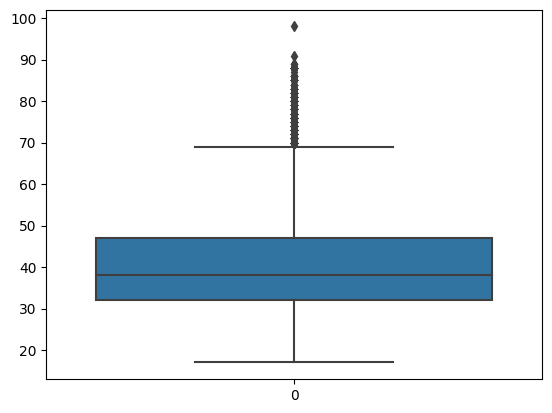

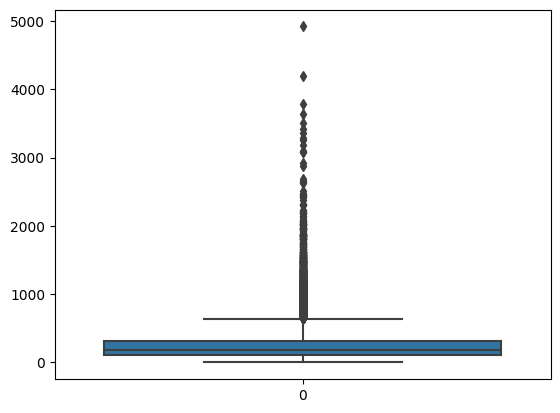

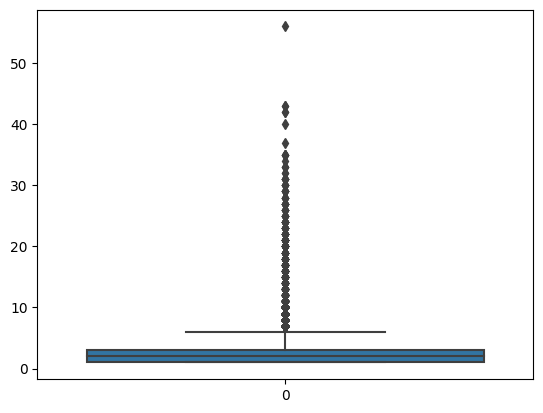

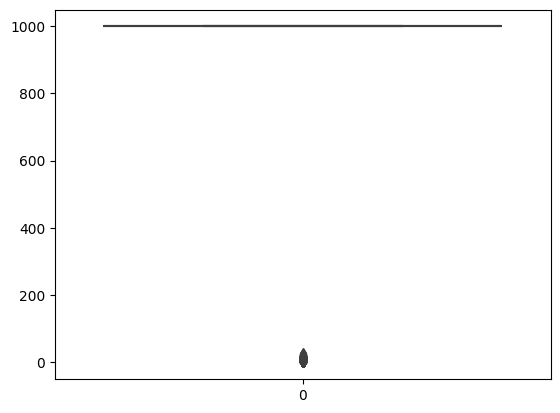

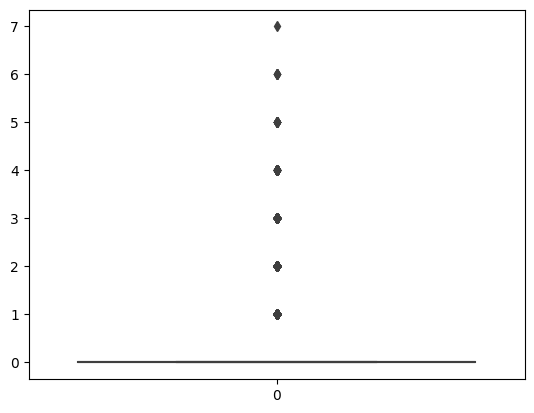

In [12]:
#check for outliers in the dataset
for i in train_data.columns:
    if train_data[i].dtype!='object':
        sns.boxplot(train_data[i])
        plt.show()

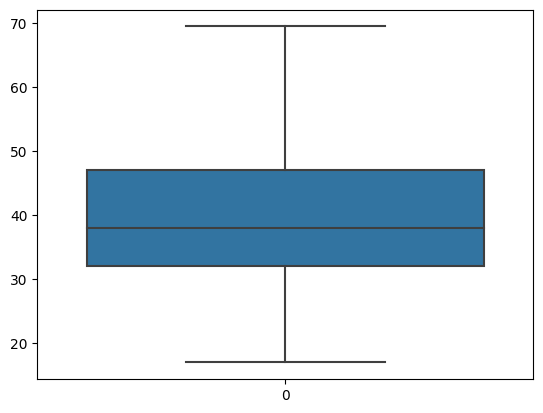

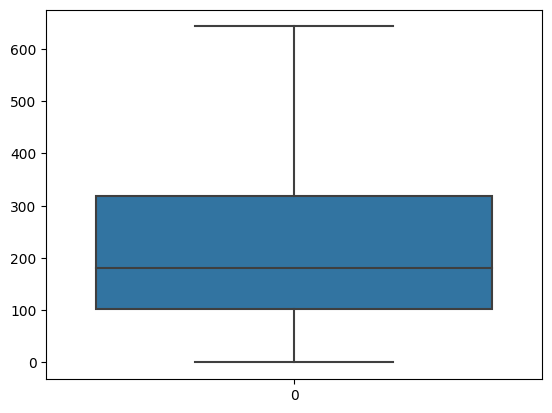

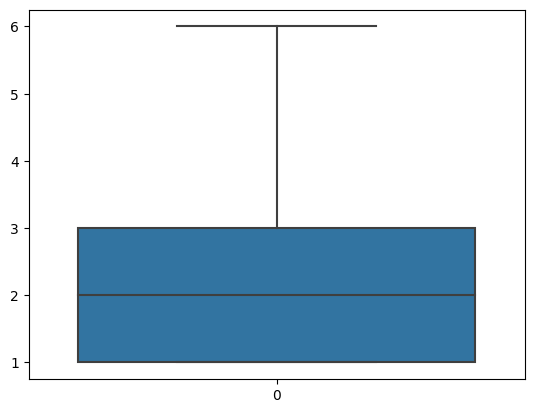

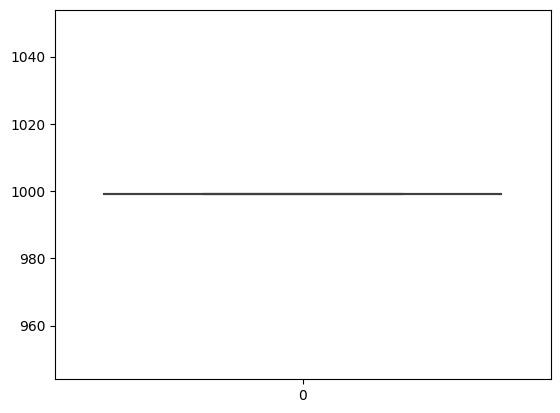

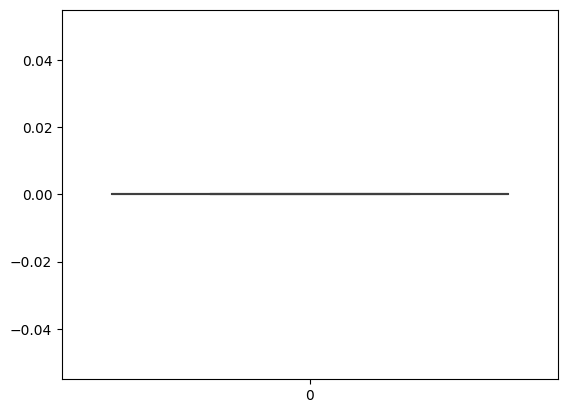

In [13]:
#remove outliers
for i in train_data.columns:
    if train_data[i].dtype!='object':
        q1,q3=train_data[i].quantile([0.25,0.75])
        iqr=q3-q1
        ub=q3+1.5*iqr
        lb=q1-1.5*iqr
        train_data[i]=train_data[i].apply(lambda x:ub if x>ub else lb if x<lb else x)
        sns.boxplot(train_data[i])
        plt.show()

In [14]:
train_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49.0,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227.0,4.0,999.0,0.0,nonexistent,no
1,37.0,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202.0,2.0,999.0,0.0,failure,no
2,69.5,retired,married,basic.4y,no,no,no,cellular,jul,mon,643.0,1.0,999.0,0.0,nonexistent,yes
3,36.0,admin.,married,university.degree,no,yes,no,telephone,may,mon,120.0,2.0,999.0,0.0,nonexistent,no
4,59.0,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368.0,2.0,999.0,0.0,nonexistent,no


In [15]:
train_data.shape

(32942, 16)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          32942 non-null  float64
 1   job          32942 non-null  object 
 2   marital      32942 non-null  object 
 3   education    32942 non-null  object 
 4   default      32942 non-null  object 
 5   housing      32942 non-null  object 
 6   loan         32942 non-null  object 
 7   contact      32942 non-null  object 
 8   month        32942 non-null  object 
 9   day_of_week  32942 non-null  object 
 10  duration     32942 non-null  float64
 11  campaign     32942 non-null  float64
 12  pdays        32942 non-null  float64
 13  previous     32942 non-null  float64
 14  poutcome     32942 non-null  object 
 15  y            32942 non-null  object 
dtypes: float64(5), object(11)
memory usage: 5.3+ MB


In [17]:
#Convert categorical data into numerical data
train_data = pd.get_dummies(train_data, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
test_data = pd.get_dummies(test_data, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

#### Exploratory Data Analysis

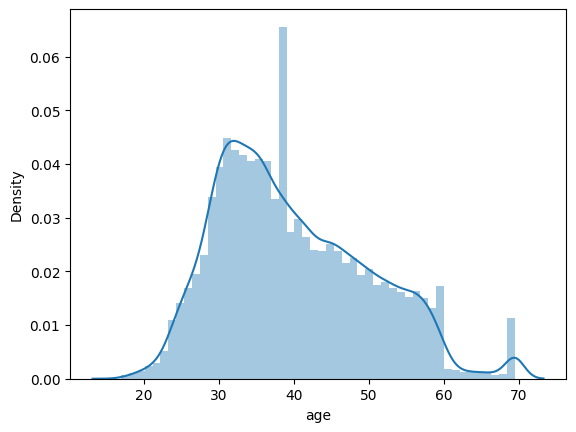

In [19]:
#perform eda for each column
#age
sns.distplot(train_data['age'])
plt.show()

In [28]:
train_data.value_counts().sort_values(ascending=False)

age   duration  campaign  pdays  previous  y    job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  job_management  job_retired  job_self-employed  job_services  job_student  job_technician  job_unemployed  job_unknown  marital_divorced  marital_married  marital_single  marital_unknown  education_basic.4y  education_basic.6y  education_basic.9y  education_high.school  education_illiterate  education_professional.course  education_university.degree  education_unknown  default_no  default_unknown  default_yes  housing_no  housing_unknown  housing_yes  loan_no  loan_unknown  loan_yes  contact_cellular  contact_telephone  month_apr  month_aug  month_dec  month_jul  month_jun  month_mar  month_may  month_nov  month_oct  month_sep  day_of_week_fri  day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  poutcome_nonexistent  poutcome_success
33.0  643.0     1.0       999.0  0.0       yes  False       True             False             False          Fa